![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

## Plotting with animation

An animated plot is just a series of plots that are linked together to work as a movie.

Matplotlib come with a rich collection of tools to allow us to make movies. In this notebook, we will give a simple example, to get you started. Read online to get many more examples and details.

First we load in a bunch of modules that do the work in creating the animation.

In [ ]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from IPython.display import clear_output
from time import sleep

Next, we create a simple for loop to do the animation.

In this loop, for each index i, we plot a shifted sine function, $\sin(x - i/10)$. We then show the plot, pause sleep for a fraction of a second using the "sleep" command, then clear the output and graph the next step in the animation. 

Here is the code. Run it!

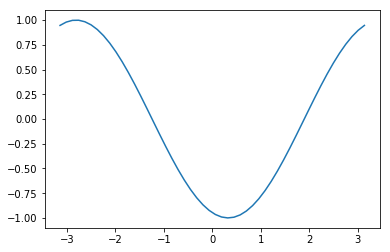

In [17]:
n = 20
x = linspace(-pi,pi)
for i in range(n):
    plot(x,sin(x-i/10))
    show()
    sleep(0.1)
    clear_output(wait=True)


This idea for animation came from a blog by Allen Downey.
[https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/](https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/)

A sample of his code is here:

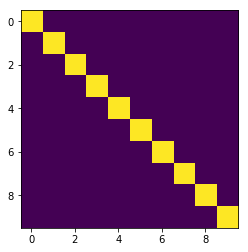

In [16]:
n = 10
a = zeros((n, n))
figure()

for i in range(n):
    imshow(a)
    show()
    a[i, i] = 1
    sleep(0.1)
    clear_output(wait=True)
imshow(a);

## The hard way

Smoother annimations are possible. However, you need to have the appropriate software tools installed, which is not always the case. 

We we show this method anyway, in case you need to try something else.

First, install a few tools here:

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML

## Animate tools

First, we create a figure object using the subplot command, and define two functions "init" and "animate". Init() sets up the y-data in the plot for us, for the initial frame in the animation. Animate() defines the data for the series of plots we want to display.

In this case, we plot translates of the sine function. Animate(i) uses the variable i to count frames, and that i value determines how much we translate the sine function by.

In this example, i will range from 0 to 99, giving a full cycle of the sine function.

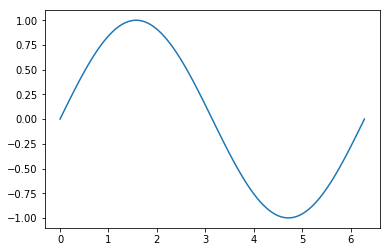

In [21]:
fig, ax = subplots()

x = linspace(0, 2*pi, 100)
line, = ax.plot(x, sin(x));


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(sin(x + 2*pi*i / 100))  # update the data.
    return line,

Next, we call the animation function as follows, making use of the figure, init and animate functions defined above.

This creates a new data object call "ani" which holds the movie.

In [22]:
ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=100)


Finally, we display the movie using the HTML() command from the module IPython.display.

In [23]:
HTML(ani.to_html5_video())

### Example 2. Saving the movie
A simple "save" command turns the animation into an mp4 movie file, that you can use elsewhere.

In [24]:
ani.save("movie.mp4")


### Example 3. Playing the movie
Now that the movie is saved, we can just play it directly in html. This is a useful trick in case you have a movie that takes a long time to create. You can create and save, and let the next user just play the result.

In [25]:
%%html
<iframe src="movie.mp4"></iframe>

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)